<a href="https://www.kaggle.com/code/ebrukrkkay/rms-titanic-eda?scriptVersionId=102049933" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# INTRODUCTION
RMS Titanic, It was the world's largest steam passenger ship when it was completed in 1912. On the night of April 15, 1912, it hit an iceberg on its first voyage and sank into the icy waters of the North Atlantic in about two hours and forty minutes. Its sinking resulted in the deaths of 1,514 people and went down in history as one of the greatest maritime disasters.

1. [Load and Check Data](#1)
2. [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable Analysis](#4)
        * [Numerical Variable Analysis](#5)
3. [Basic Data Analysis](#6)
4. [Outlier Detection](#7)
5. [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id='1'></a>
## Load and Check Data

In [2]:
train_df= pd.read_csv("../input/titanic/train.csv")
test_df= pd.read_csv("../input/titanic/test.csv")
test_PassengerId= test_df["PassengerId"]
# PassengerId özelliği daha sonradan kullanılacağı ve bozulmasını istemediğimiz için onu farklı bir değişkene atadık

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()
# sayısal sütunlar ile ilgili istatstikleri verir descrive() metodu

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id='2'></a>
## Variable Description
1. PassengerId : Unique ID number to each pessenger ///Yolcu Numarası
2. Survived    : pessenger survive(1) or died(0) ///Hayatta kalıp kalmadığı
3. Pclass      : pessenger class ///Yolcu sınıfı
4. Name        : İsim 
5. Sex         : Cinsiyet
6. Age         : Yaş
7. SibSp       : number of siblings or spouses ///Kardeş ya da Eşinin gemide olup olmadığı
8. Parch       : number of parents or children ///Ebeveynlerinin ya da Çocuklarının gemide olup olmadığı
9. Ticket      : ticket number ///Bilet numarası
10. Fare       : amount of money spent on ticket ///Bilet Ücreti
11. Cabin      : cabin category ///Kabin kategorisi (kalınan oda)
12. Embarked   : port where passenger embarked (C: Cherbourg, Q: Queenstown, S: Southampton )///Gemiye hangi limandan binilidiği (C-Q-S)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Fare and Age
* int64(5): Pclass, SibSp, Parch, PassengerId and Survived
* object(5): Cabin, Embarked, Ticket, Name and Sex

<a id='3'></a>
## Univariate Variable Analysis
* Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, SibSp and Parch
* Numerical Variable: Fare, Age, PassengerId

<a id='4'></a>
### Categorical Variable

In [7]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = train_df[variable]
    # count number of categorical variable (value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

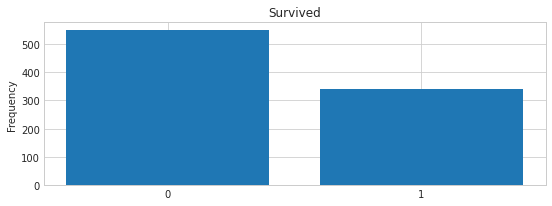

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


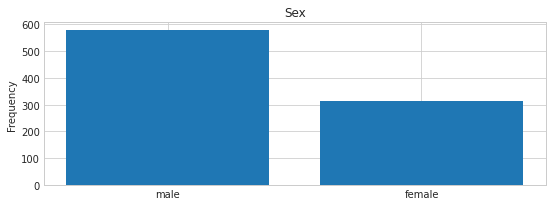

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


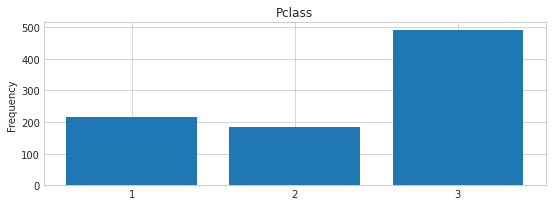

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


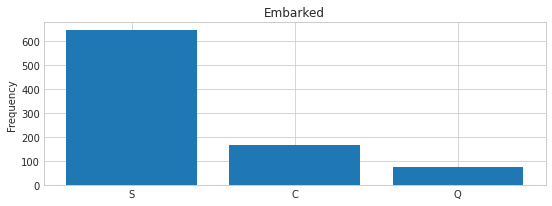

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


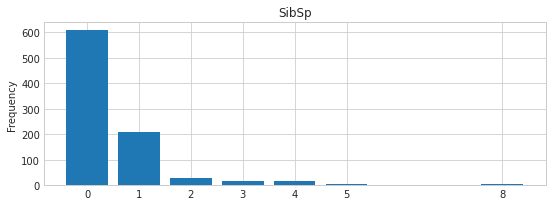

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


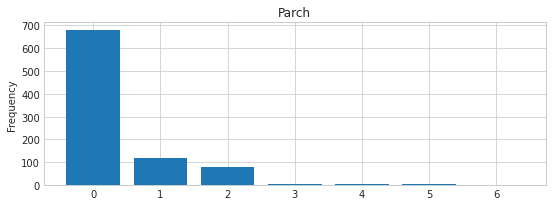

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [8]:
category1= ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in category1:
    bar_plot(c)

In [9]:
category2 =["Cabin","Name","Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 



<a id='5'></a>
### Numerical Variable

Histogram ile bir veri setindeki herhangi bir feature'ın dağılımını inceleyeceğiz.

In [10]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable], bins= 10)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

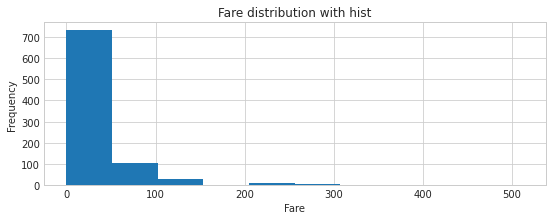

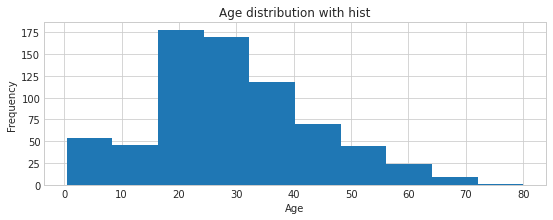

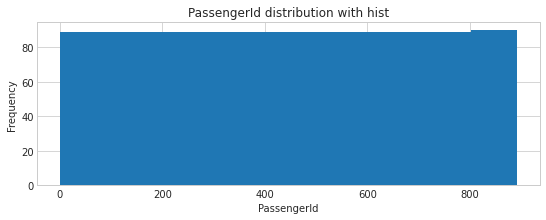

In [11]:
numericVar= ["Fare","Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

histogramı belirlerken default olarak bins=10 olarak alındığından dolayı PassengerId feature'ının sıklığı 80den fazla olarak gözüküyor bins değerini 800 civarında yaptığımızda (800den fazla yolcu olduğu için) bu sıklık değerini her PassengerId için 1.0 olarak görürüz bu aslında bizim almamız gereken doğru sonuçtur. Analiz yaparken PassengerId bizim için çok önemli bir analiz sonucunu etkileyecek özellik değildir.

<a id='6'></a>
## Basic Data Analysis
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived
<br><br>

Bu bölümde hangi özelliğin yolcunun hayatta kalması ile alakalı olduğu incelenecektir.

In [12]:
# Pclass - Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Data frame'den sadece Pclass ve Survived sütunları alınarak Pclass'a göre gruplandı ve bu grubun ortalaması alındı.Bu ortalamalar Survived özelliğinde azalan olarak sıralandı.
* Buradaki analizimizin sonucunda %62 olasılıkla 1.sınıf yolcuların hayatta kaldığını görmüş olduk

In [13]:
# Sex - Survived
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


* Kadınlar %74 oranında hayatta kalmıştır.

In [14]:
# SibSp - Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


2 ve 2den küçük SibSp değerine sahip yolcuların hayatta kalma oranı daha yüksektir

In [15]:
# Parch - Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Bir yolcunun Parch özelliğinin değeri arttıkça bu yolcunun hayatta kalma oranı azalmaktadır.

<a id='7'></a>
## Outlier Detection
Elimizde olan değerlerden çok yüksek ya da çok düşük bir değer varsa verinin içerisinde buna outlier denir ve analiz sırasında yanlış çıkarımlara neden olabilir.
* First Quartile: Q1
* Third Quartile: Q3
* Second Quartile: Q2 : Median
* IQR= Q3 -Q1 
* * IQR x 1.5 = Outlier Detection Step
* * Q1-Outlier Detection Step || Q3+Outlier Detection Step  : İle belirlenen aralığın dışında kalan sayılar outlier sayılır

In [16]:
def detect_outliers(df, features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1=np.percentile(df[c],25)
        # 3rd quartile
        Q3=np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step= IQR*1.5
        # detect outlier and their indeces
        outlier_list_col=df[(df[c]< Q1-outlier_step) | (df[c]> Q3+outlier_step)].index   # Burada bir df oluşturulduğu için outlier indexini aldık.
        # store indeces
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers= list(i for i, v in outlier_indices.items() if v > 2)  
    # eğer df içerisinde 2den fazla feature outlier'a sahipse o zaman bu iki index çıkarılır. Daha az ise feature çıkarmaya çok büyük verilerde gerek yoktur.
    
    return multiple_outliers

In [17]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [18]:
# drop outliers
train_df= train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]), axis=0).reset_index(drop=True)

In [19]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Görüldüğü üzere artık data frame'de hiçbir outlier kalmamıştır.

<a id='8'></a>
## Missing Value
    * Find Missing Value
    * Fill Missing Value

In [20]:
train_df_len= len(train_df)
train_df= pd.concat([train_df,test_df],axis=0).reset_index(drop=True)
# burada şöyle bir sorun ile karşılaşabiliriz, kodu ilk run edişimizde train ve test df'leri birleştiriyoruz ve tekrar run edersek yine birleştirmiş oluyoruz bu yüzden restart and run seceneğini kullanmamız gerekir.

In [21]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id='9'></a>
### Find Missing Value

In [22]:
train_df.columns[train_df.isnull().any()]
# nerelerde missing value olduğuna bakalım

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [23]:
train_df.isnull().sum()
# kaç tane missing value olduğunu görelim

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

<a id='10'></a>
### Fill Missing Value
* Embarked has 2 missing value
* Fare has only 1 missing value

In [24]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


60 ve 821 id'lerine sahip iki yolcunun embarked değerinin ne olduğu bilinmiyor. Bu boş değerleri dolduralım, peki hangi özelliğe göre doldurmamız daha doğru olur? Yolcunun bindiği limanı hangi özellik daha iyi yansıtabilir ? Pclass'a bakıp 1.sınıf yolcuların çoğunlukla hangi limandan bindiğine bakıp yorum yapılabilir ya da ücret olarak(fare) 80 birim para ödeyen kişilerin hangi limandan bindiğine bakılarak bir çıkarım yapılabilir. 

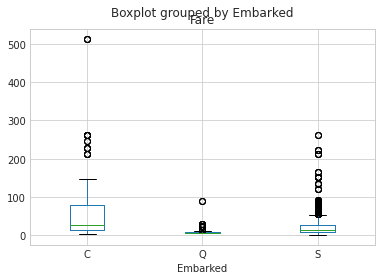

In [25]:
train_df.boxplot(column="Fare", by="Embarked")
plt.show()

Burada ödenen ücret ile binilen liman arasındaki ilişki boxplot ile gösterilmektedir. 
<br> Q ve S limanlarından binen yolcuların ödedikleri ücret 80 birimden daha düşük gözükmektedir. O halde muhtemelen bu iki kayıp değere sahip yolcu C limanından binmiştir. O halde bu boş değerleri C ile dolduralım.

In [26]:
train_df["Embarked"]= train_df["Embarked"].fillna("C")
# doğru işlem yapıp yapmadığımızı kontrol edelim
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Boş olduğuna göre artık missing value sahip bir yolcu kalmamıştır.

In [27]:
# Şimdi NaN olan Fare değerine sahip yolcuya bakalım.
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Bu yolcu S limanından binmiş, az önceki boxplot'tan yola çıkarsak orta seviye yolcu olabilir, 3.sınıfta konaklamış. Burada Pclass değerini kullanabiliriz.

In [28]:
avg_fare= np.mean(train_df[train_df["Pclass"] == 3]["Fare"])
# 3.sınıfta kalan yolcular ortalama ne kadar ücret ödemişler ona bakıyoruz, çıkan sonuç ile boş indexleri dolduruyoruz
train_df["Fare"]= train_df["Fare"].fillna(avg_fare)
avg_fare

12.741219971469329

In [29]:
# boş Fare değeri kaldı mı bakalım
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Kalmadı.